### Gausian Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def gaussian_mask(size,sigma):
    mask=np.fromfunction(lambda x, y : (1/(2*np.pi*sigma**2)) * np.exp(-((x-size//2)**2 + y-size//2)**2)/(2*sigma**2),(size,size))
    return mask/np.sum(mask)

def convolve(img,mask):
    img_height  = img.shape[0]
    img_width = img.shape[1]
    mask_size = mask.shape[0]
    
    pad_size = mask_size // 2
    
    result = np.zeros_like(img)
    
    padded_img = np.pad(img , ((pad_size , pad_size) , (pad_size,pad_size)), mode = 'constant')
    plt.imshow(padded_img)
    
    for i in range(img_height):
        for j in range(img_width):
            
            region = padded_img[i:i+mask_size , j:j+mask_size]
            
            result[i,j] = np.sum(region * mask)
    return result.astype(np.uint8)

img = plt.imread(r'C://Users//jayag//Desktop//Marwadi//SEM-6//Mini-Project//3.jpeg')

if len(img.shape) > 2:
    img = np.mean(img , axis=2)
    
size=19
sigma=-1000

gausian_kernel=gaussian_mask(size,sigma)
print("Gausian Mask:",gausian_kernel)



Gausian Mask: [[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000

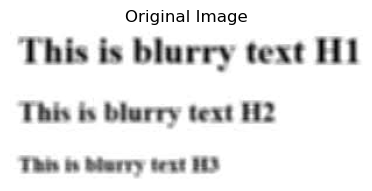

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img , cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.show()

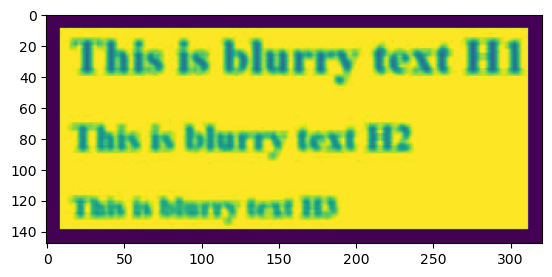

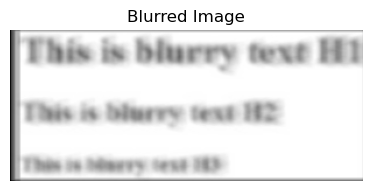

In [13]:
blur_img = convolve(img , gausian_kernel)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(blur_img , cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.show()
